# Pymaceuticals Inc.
---

### Analysis

- After removing duplicate mines, the total number of mice being analyzed were 248. In addition, the data collected had roughly the same amount of male (51%) and female (49%) mice. These factors will aid in providing the best outcome for a larger population based on this subset of variables.

- From looking at the box plot, it shows that the drugs Capomulin and Ramicane do a better job at reducing the size of tumors overtime.  In addition to comparing the drugs overall, looking into a specific drug can help us better understand how well mice perform while undergoing the specific treatment.
   - Capomulin was displayed on a line graph which compared the tumor volume over days. This further supports the idea that Capomulin does a better job at reducing the volume of tumors.

- The plot with the line regression helped show the relationship between average tumor volume and average weight. Since the correlation value is 0.84 (close to the value 1), it can be concluded that tumor volume and weight are positively correlated. This means that mice with more weight will have larger tumor masses.

- Overall, we can conclude that Capomulin and Ramicane drugs do the best to reduce tumor volume over time. Also, tumor volume has a positive correlation with weight, so as weight increases so will the tumor size and vice versa.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#source 01 used merge() to merge two dataframes
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.

#gathered all the unique mouse IDs
unique_mice = combined_df['Mouse ID'].unique()

#check the length of the unique mouse IDs
number_mice = len(unique_mice)
number_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#source 02 used duplicated() to gather duplicates and a conditional statement
duplicate_mice = combined_df[combined_df[['Mouse ID', 'Timepoint']].duplicated() == True]

#gather all the unique duplicate mice ids
duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

#use conditionals to find the 'g898'
#use loc to find the rows with 'g898' and the columns associated with it
duplicate_mice_id_df = combined_df.loc[combined_df['Mouse ID'] == 'g989', :]
duplicate_mice_id_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#similar to the function above used conditionals to find values not equal to 'g898'
#then used loc to find rows associated with it
clean_df = combined_df.loc[combined_df['Mouse ID'] != 'g989', :]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.

#gather unique mouse ids from cleaned dataframe
clean_mice_df = clean_df['Mouse ID'].unique()

#check the length
clean_number_mice = len(clean_mice_df)
clean_number_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#used tab to figure out the functions for mean, median, etc.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std_dev = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

#create a dataframe and put it into a dictionary
drug_summary_df = pd.DataFrame({'Mean Tumor Volume': mean,
                        'Median Tumor Volume': median,
                        'Tumor Volume Variance': variance,
                        'Tumor Volume Std. Dev.': std_dev,
                        'Tumor Volume Std. Err.': sem})

#display the dataframe
drug_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#source 03 used the aggregation method with groupby
agg_drug_summary_df = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_drug_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

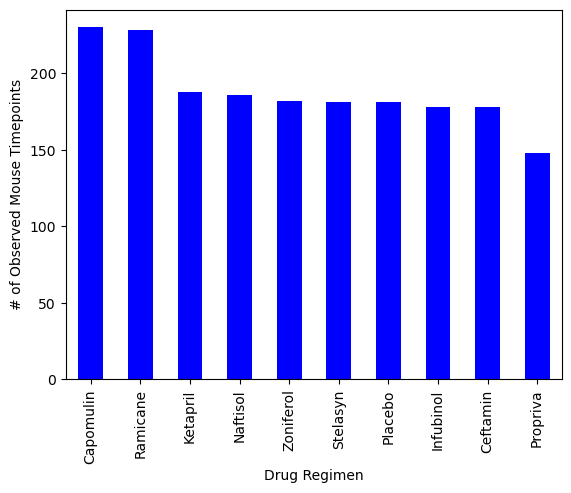

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#filter out 'Drug Regimen' and find the values accordingly using value_counts
mice_drug = clean_df['Drug Regimen'].value_counts()

#plot graph using pandas
mice_drug.plot(kind='bar',
               color='b',
               xlabel='Drug Regimen',
               ylabel='# of Observed Mouse Timepoints')
plt.show()

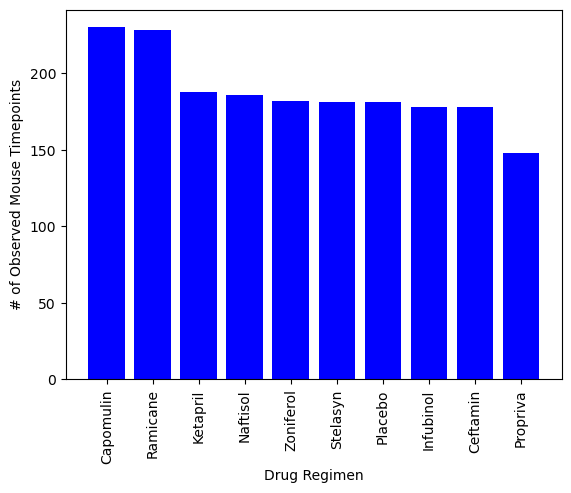

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#find the x and y values
# source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.values.html
x_axis = mice_drug.index.to_numpy()
y_axis = mice_drug.to_numpy()

#use pyplot to create bar graph
#source 04 used to figure out formatting
plt.bar(x_axis, y_axis, color='blue', alpha=1, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#source 05 for rotation of x axis labels
plt.xticks(rotation=90)

#display the bar graph
plt.show()

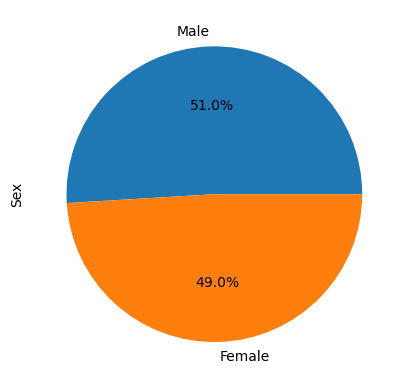

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#use value_counts to filter out data
mice_gender = clean_df['Sex'].value_counts()

labels = ['Male', 'Female']

#plot pie chart
mice_gender.plot(kind='pie', y=labels, autopct='%1.1f%%', ylabel='Sex')
plt.show()

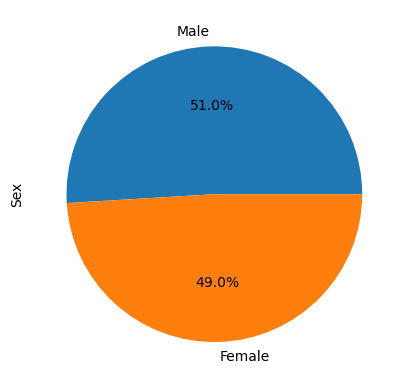

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#source 06 used for pie chart formatting
# fix code so it's not 'hard coded'
gender_mice = clean_df['Sex'].value_counts()

#plot pie chart
plt.pie(gender_mice, labels=labels,autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#source 01
merged_df = pd.merge(max_timepoint, clean_df, on=(['Mouse ID','Timepoint']))

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    t_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    final_tvol = t_vol['Tumor Volume (mm3)']

    #add tumor data to empty list
    tumor_vol_data.append(final_tvol)

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#source 07 for quartile calculations

#calculations for capomulin
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[.25]
upperq0 = quartile0[.75]
iqr0 = upperq0-lowerq0

#calculations for ramicane
quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[.25]
upperq1 = quartile1[.75]
iqr1 = upperq1-lowerq1

#calculations for infubinol
quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[.25]
upperq2 = quartile2[.75]
iqr2 = upperq2-lowerq2

#calculations for ceftamin
quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[.25]
upperq3 = quartile3[.75]
iqr3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*iqr0)
upper_bound0 = upperq0 + (1.5*iqr0)

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

#print outliers
print(f"{treatments[0]}'s potential outliers: {lower_bound0}, {upper_bound0}")
print(f"{treatments[1]}'s potential outliers: {lower_bound1}, {upper_bound1}")
print(f"{treatments[2]}'s potential outliers: {lower_bound2}, {upper_bound2}")
print(f"{treatments[3]}'s potential outliers: {upper_bound3}, {upper_bound3}")

Capomulin's potential outliers: 20.70456164999999, 51.83201549
Ramicane's potential outliers: 17.912664470000003, 54.30681135
Infubinol's potential outliers: 36.83290494999999, 82.74144559000001
Ceftamin's potential outliers: 87.66645829999999, 87.66645829999999


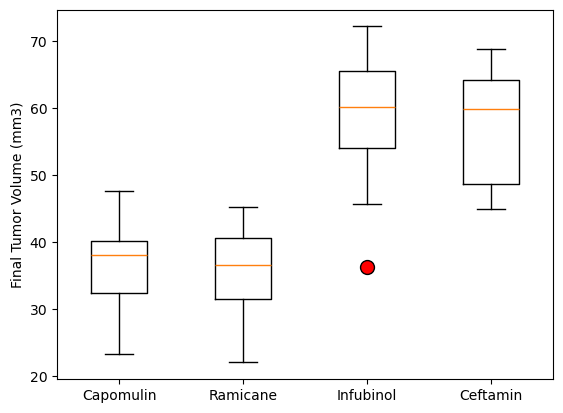

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#source 07 to plot a boxplot

#source 08 to format the boxplot (i.e. marker color, marker size)
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#find mouse treated with capomulin
cap_mouse = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

#look at the list to find the name of specidic mouse using the commented out code below
# cap_mouse.value_counts('Mouse ID')


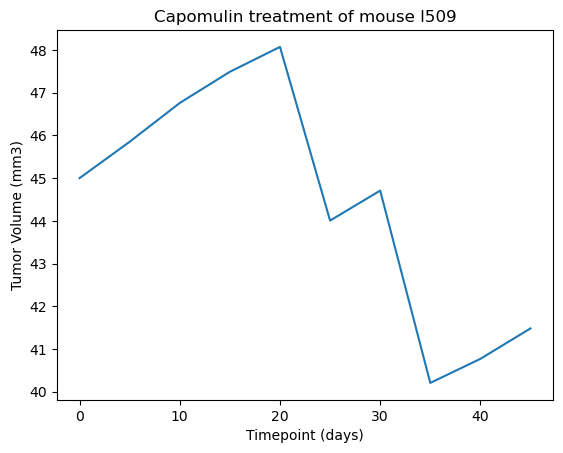

In [28]:
#find data for mouse we found 'l509'
mouse_l509 = clean_df.loc[clean_df['Mouse ID'] == 'l509']

#generate the line plot for mouse 'l509'

#set the x and y axis to plot
y_axis = mouse_l509['Tumor Volume (mm3)']
x_axis = mouse_l509['Timepoint']

#plot the graph and add labels
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

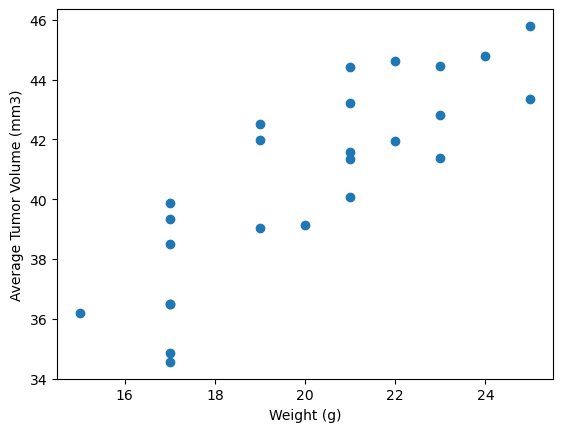

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#gather average tumor volume and weight
cap_avg_weight = cap_mouse.groupby(['Mouse ID'])['Weight (g)'].mean()
cap_avg_vol = cap_mouse.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()

#generate scatterplot
plt.scatter(cap_avg_weight, cap_avg_vol, marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


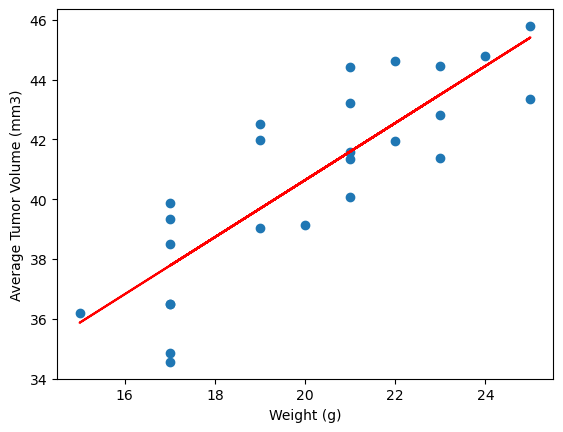

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#source 09 to calculate correlation
correlation = st.pearsonr(cap_avg_weight,cap_avg_vol)

print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

#source 10 to calculate regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_avg_weight, cap_avg_vol)
regress_values = cap_avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph
plt.scatter(cap_avg_weight, cap_avg_vol)
plt.plot(cap_avg_weight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()